In [1]:
import pandas
import numpy
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score

In [2]:
# Load data
df = pandas.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,197999.000000,197999.000000,197999.000000,197999.000000,197999.000000,197999.000000,197999.000000,197999.000000,197999.000000,197999.000000,...,197999.000000,197999.000000,197999.000000,197999.000000,197999.000000,197999.000000,197999.000000,197999.000000,197999.000000,197999.000000
mean,70015.890484,-0.108035,0.004609,0.327843,0.078122,-0.114642,0.046869,-0.052195,0.018068,0.008952,...,-0.015218,-0.049697,-0.015814,0.004462,0.062266,0.006468,0.001587,0.001963,89.693621,0.001934
std,34232.182102,1.891563,1.622898,1.445717,1.398766,1.360658,1.310211,1.216065,1.210511,1.136456,...,0.738457,0.690338,0.610998,0.603403,0.490274,0.488550,0.394006,0.314193,248.752551,0.043939
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,44088.500000,-0.962719,-0.580056,-0.323845,-0.790336,-0.786074,-0.709417,-0.576876,-0.180113,-0.663932,...,-0.227240,-0.538444,-0.168646,-0.341387,-0.238394,-0.331205,-0.067327,-0.041180,5.990000,0.000000
50%,66913.000000,-0.094637,0.082283,0.498322,0.078755,-0.172193,-0.218222,-0.011327,0.043820,-0.074293,...,-0.043466,-0.036344,-0.029186,0.052845,0.104995,-0.061019,0.006063,0.018550,22.990000,0.000000
75%,89964.000000,1.212764,0.783967,1.226250,0.889982,0.461220,0.444922,0.499118,0.339245,0.626615,...,0.149703,0.420220,0.114536,0.421501,0.385175,0.261955,0.089120,0.078224,79.200000,0.000000
max,132273.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [4]:
# Check for NULL values
null_values = df.isnull().sum()
print(null_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Split data into majority (legitimate) and minority (fraudulent)
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

Text(0.5, 1.0, 'Transaction Amount Distribution - Fraud vs. Legit')

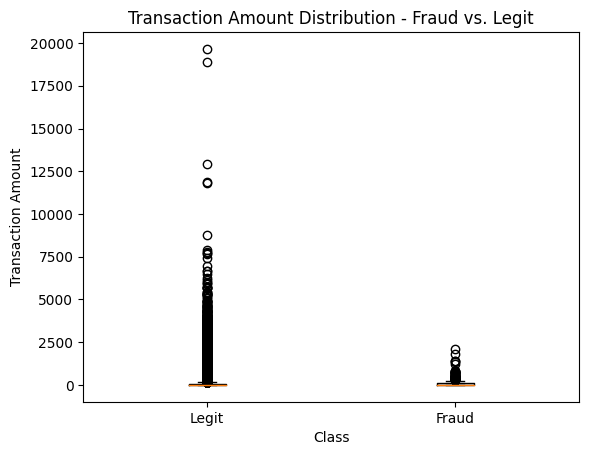

In [6]:
# Check if there's relationship between amount and fraud
pyplot.boxplot([legit['Amount'], fraud['Amount']], labels=['Legit', 'Fraud'])
pyplot.xlabel('Class')
pyplot.ylabel('Transaction Amount')
pyplot.title('Transaction Amount Distribution - Fraud vs. Legit')

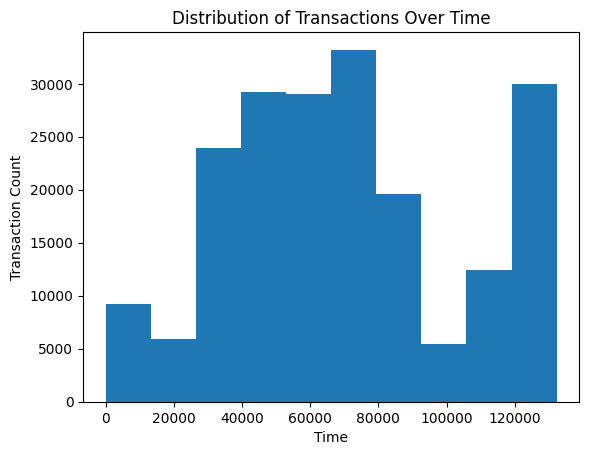

In [37]:
# Check temporal patterns
pyplot.hist(df['Time'])
pyplot.title('Distribution of Transactions Over Time')
pyplot.xlabel('Time')
pyplot.ylabel('Transaction Count')
pyplot.show()

In [50]:
# Group transactions by transaction amount ranges
amount_ranges = [0, 50, 100, 200, 500, 1000, 5000, float('inf')]
amount_labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5000+']

# For legit data
legit.loc[:, 'LegitAmountRange'] = pandas.cut(legit['Amount'], bins=amount_ranges, labels=amount_labels)

# Print the count of transactions in each amount range
legit_amount_counts = legit['LegitAmountRange'].value_counts().sort_index()
legit_total_transactions = len(legit)
legit_amount_percentages = (legit_amount_counts / legit_total_transactions) * 100

# Print the count and percentage for each amount range
print("Legitimate")
for label, count, percentage in zip(amount_labels, legit_amount_counts, legit_amount_percentages):
    print(f"Amount Group: {label} - Count: {count}, Percentage: {percentage:.2f}%")
    
print()
# For fraud data
fraud.loc[:, 'FraudAmountRange'] = pandas.cut(fraud['Amount'], bins=amount_ranges, labels=amount_labels)

# Print the count and percentage for each amount range
fraud_amount_counts = fraud['FraudAmountRange'].value_counts().sort_index()
fraud_total_transactions = len(fraud)
fraud_amount_percentages = (fraud_amount_counts / fraud_total_transactions) * 100

print("Fraudulent")
for label, count, percentage in zip(amount_labels, fraud_amount_counts, fraud_amount_percentages):
    print(f"Amount Group: {label} - Count: {count}, Percentage: {percentage:.2f}%")

Legitimate
Amount Group: 0-50 - Count: 129974, Percentage: 65.77%
Amount Group: 51-100 - Count: 26408, Percentage: 13.36%
Amount Group: 101-200 - Count: 19583, Percentage: 9.91%
Amount Group: 201-500 - Count: 13863, Percentage: 7.02%
Amount Group: 501-1000 - Count: 4349, Percentage: 2.20%
Amount Group: 1001-5000 - Count: 2045, Percentage: 1.03%
Amount Group: 5000+ - Count: 36, Percentage: 0.02%

Fraudulent
Amount Group: 0-50 - Count: 214, Percentage: 55.87%
Amount Group: 51-100 - Count: 50, Percentage: 13.05%
Amount Group: 101-200 - Count: 36, Percentage: 9.40%
Amount Group: 201-500 - Count: 40, Percentage: 10.44%
Amount Group: 501-1000 - Count: 19, Percentage: 4.96%
Amount Group: 1001-5000 - Count: 6, Percentage: 1.57%
Amount Group: 5000+ - Count: 0, Percentage: 0.00%


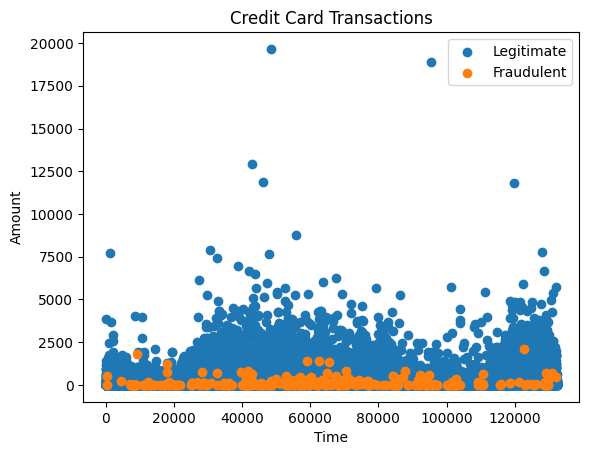

In [7]:
# Check for class imbalance
pyplot.scatter(df.iloc[legit.index]['Time'], df.iloc[legit.index]['Amount'], label = 'Legitimate')
pyplot.scatter(df.iloc[fraud.index]['Time'], df.iloc[fraud.index]['Amount'], label = 'Fraudulent')
pyplot.title('Credit Card Transactions')
pyplot.xlabel('Time')
pyplot.ylabel('Amount')
pyplot.legend()
pyplot.show()

In [8]:
# Randomly sample the legitimate data to match the number with fradulent
legit_balanced = legit.sample(n = len(fraud))

In [9]:
# Combine the balanced legitimate with the fraudulent
df_balanced = pandas.concat([legit_balanced, fraud])

In [10]:
# Preprocess balanced data
X = df_balanced.drop(['Time','Class'], axis = 1)
y = df_balanced['Class']

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Logistic Regression

In [27]:
# Create and train logistic regression model
lr_model = LogisticRegression(max_iter=600)
lr_model.fit(X_train, y_train)

# Make prediction using logistic regression model
lr_y_pred = lr_model.predict(X_test)

# AUPRC for logistic regression model
lr_auprc_score = average_precision_score(y_test, lr_y_pred)
print("LR AUPRC Score:", lr_auprc_score)

LR AUPRC Score: 0.9316017316017317


In [28]:
# Get and print feature coefficients
lr_feature_importances = lr_model.coef_[0]
for feature, coef in zip(X_train.columns, lr_feature_importances):
    print(f"{feature}: {coef}")

V1: 0.1392715034404434
V2: 0.0549229327640539
V3: 0.0653419775425454
V4: 0.8552994185653893
V5: 0.13307606494614127
V6: -0.23535186345722375
V7: -0.07241961758906652
V8: -0.49481818806826683
V9: -0.19360253683325804
V10: -0.7279576404560404
V11: 0.19603130366204502
V12: -0.5319880958169413
V13: -0.25425839353480956
V14: -0.6658928240079963
V15: -0.03944393352296985
V16: -0.48320701879236433
V17: -0.3947186635122492
V18: -0.10350237145576333
V19: -0.02983202211396549
V20: -0.47128255726546936
V21: -0.6055330472278037
V22: 0.6146719259844865
V23: -0.22192096843371148
V24: -0.10333097989782915
V25: 0.297169130313556
V26: 0.17630099665938753
V27: -0.2257324761369183
V28: 0.625717231974211
Amount: 0.002323874548653735


#### Decision Tree

In [26]:
# Create and train decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make prediction using decision tree model
dt_y_pred = dt_model.predict(X_test)

# AUPRC for decision tree model
dt_auprc_score = average_precision_score(y_test, dt_y_pred)
print("DT AUPRC Score:", dt_auprc_score)

DT AUPRC Score: 0.8499924963924964


In [21]:
# Get and print feature importances
dt_feature_importance = dt_model.feature_importances_
for feature, importance in zip(X_train.columns, dt_feature_importance):
    print(f"{feature}: {importance}")

V1: 0.025793077326853448
V2: 0.0
V3: 0.0
V4: 0.06998782760625578
V5: 0.0
V6: 0.005942024482694339
V7: 0.019094467913238655
V8: 0.0
V9: 0.005882604237867397
V10: 0.030113945524696872
V11: 0.0
V12: 0.00619221498722884
V13: 0.012677220162560548
V14: 0.7250993872411918
V15: 0.00504223220388634
V16: 0.0
V17: 0.025669545765239537
V18: 0.004357484620642515
V19: 0.0
V20: 0.007923945047948203
V21: 0.024215293952136063
V22: 0.0
V23: 0.0
V24: 0.00490217019822283
V25: 0.005974533479974718
V26: 0.015159459653919485
V27: 0.0059725655954425685
V28: 0.0
Amount: 0.0


In [34]:
# Get features with non-zero importance
dt_relevant_features = ['V1', 'V4', 'V6', 'V7', 'V9', 'V10', 'V12', 'V13', 'V14', 'V15', 'V17', 'V18', 'V20', 'V21', 'V24', 'V25', 'V26', 'V27']

# Define features and target
dt_relevant_X = df[dt_relevant_features]
dt_relevant_y = df['Class']

# Split data into train and test sets
dt_relevant_X_train, dt_relevant_X_test, dt_relevant_y_train, dt_relevant_y_test = train_test_split(dt_relevant_X, dt_relevant_y, test_size=0.2)

# Train a decision tree model
dt_relevant_model = DecisionTreeClassifier()
dt_relevant_model.fit(dt_relevant_X_train, dt_relevant_y_train)

# Predict on the test set
dt_relevant_y_pred = dt_relevant_model.predict(dt_relevant_X_test)

# AUPRC for decision tree model with relevent features
dt_relevant_auprc_score = average_precision_score(dt_relevant_y_test, dt_relevant_y_pred)
print("DT Relevant AUPRC Score:", dt_relevant_auprc_score)

DT Relevant AUPRC Score: 0.5512785168048325


#### Random Forest

In [32]:
# Create and train random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make prediction using random forest model
rf_y_pred = rf_model.predict(X_test)

# AUPRC for random forest model
rf_auprc_score = average_precision_score(y_test, rf_y_pred)
print("RF AUPRC Score:", rf_auprc_score)

RF AUPRC Score: 0.9316017316017317


In [33]:
# Get and print feature importances
rf_feature_importance = rf_model.feature_importances_
for feature, importance in zip(X_train.columns, rf_feature_importance):
    print(f"{feature}: {importance}")

V1: 0.009743126799429808
V2: 0.015869063926966145
V3: 0.03851401443883117
V4: 0.11948428515660746
V5: 0.009039011348704646
V6: 0.0179517659994429
V7: 0.03352702709323657
V8: 0.008082442473832862
V9: 0.012362219972938935
V10: 0.1331902972935495
V11: 0.07394031543082087
V12: 0.10184337798365255
V13: 0.006785285196730135
V14: 0.17253991792088338
V15: 0.006135580305757742
V16: 0.04117470942083192
V17: 0.093810203188006
V18: 0.005583219455846497
V19: 0.00954717494532506
V20: 0.011251400432755831
V21: 0.0199039064107104
V22: 0.006754326176972049
V23: 0.008619830641324272
V24: 0.00527547283685258
V25: 0.008557321500246498
V26: 0.008555799443696189
V27: 0.006391857761131508
V28: 0.004960098167446411
Amount: 0.010606948277470187
